In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.optimizers import Nadam
from sklearn.metrics import accuracy_score

In [7]:
from google.colab import files
import zipfile
import os

# Upload the file
uploaded = files.upload()

# Extract the uploaded file
for data_set in uploaded.keys():
    with zipfile.ZipFile(data_set, 'r') as zip_ref:
        zip_ref.extractall()  # Extracts into the current directory
    print(f"Extracted {data_set}")

Saving archive.zip to archive.zip
Extracted archive.zip


In [8]:
train_dir = '/content/Training'
test_dir = '/content/Testing'

In [9]:
# Load the ResNet101 model pre-trained on ImageNet, excluding the top layers
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:
base_model.trainable = False

In [11]:
x = layers.GlobalAveragePooling2D()(base_model.output)

# First fully connected layer
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Second fully connected layer
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)

# Third fully connected layer
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)

# Output layer for 4 classes (softmax activation for multi-class classification)
output = layers.Dense(4, activation='softmax')(x)

# Build the model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,153,668 (92.14 MB)

 Trainable params: 565,956 (2.16 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
# Data augmentation and image preprocessing for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [15]:
# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 704s 8s/step - accuracy: 0.2905 - loss: 1.5842 - val_accuracy: 0.2919 - val_loss: 1.3921
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 692s 8s/step - accuracy: 0.2648 - loss: 1.4031 - val_accuracy: 0.2919 - val_loss: 1.3909
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 692s 8s/step - accuracy: 0.2865 - loss: 1.3731 - val_accuracy: 0.2107 - val_loss: 1.3895
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 686s 8s/step - accuracy: 0.2979 - loss: 1.3555 - val_accuracy: 0.2716 - val_loss: 1.3898
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 681s 8s/step - accuracy: 0.2900 - loss: 1.3518 - val_accuracy: 0.3122 - val_loss: 1.3838
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 687s 8s/step - accuracy: 0.3059 - loss: 1.3521 - val_accuracy: 0.3020 - val_loss: 1.3835
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 746s 8s/step - accuracy: 0.3042 - loss: 1.3379 - val_accuracy: 0.4010 - val_loss: 1.3755
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 741s 8s/step - accuracy: 0.2943 - loss: 1.3408 - val_accuracy: 0.3173 - val_loss: 1.

In [16]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.2605 - loss: 1.6673
Test Accuracy: 0.27


In [17]:
# Visualize the training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

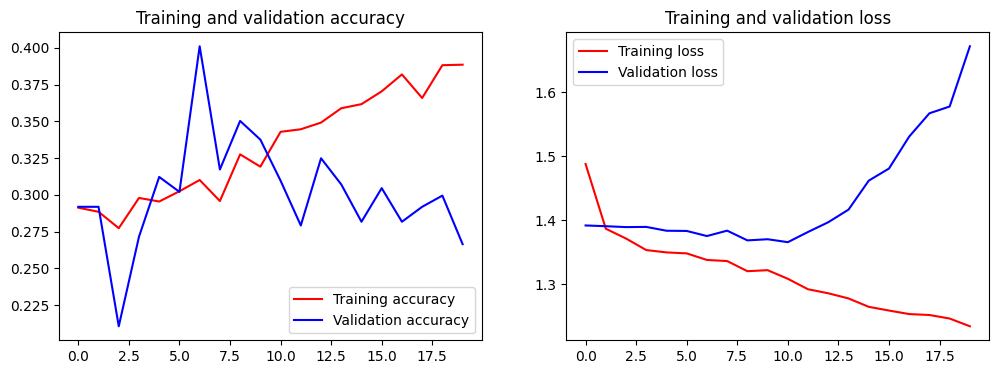

In [18]:
# Call the function to plot the training history
plot_training_history(history)

In [20]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.2677 - loss: 1.6768
Test Accuracy: 26.65
